# Analysis of component separation results

This notebook contains tools to make a quick analysis of the results of the component separation algorithm.

## Imports

In [1]:
import os 
import sys
sys.path.append(os.getcwd()+'/Library/')
from tools import *

## Load data

We load the results from the Results folder. The "border_size" parameter is $2^{J-1}$. We extract the input map "d", the clean map "s" and the separated map "s_tilde".

In [2]:
border_size = 64
sep = np.load('Results/separation_results_BR.npy')[:,border_size:-border_size,border_size:-border_size]
d = sep[0]
s = sep[1]
s_tilde = sep[2]

We define the labels, colors and styles for the plots. We also give the nature of the data (here, intensity).

In [3]:
labels = [r"$\rm{d}$",r"$\rm{s}$",r"$\rm{\tilde{s}}$"]
colors = [color[0],color[1],color[1]]
styles = ['-','-','--']
nature = r'$\rm{I}$' 

## Plot data

We plot "d", "s" and "s_tilde" side-by-side.

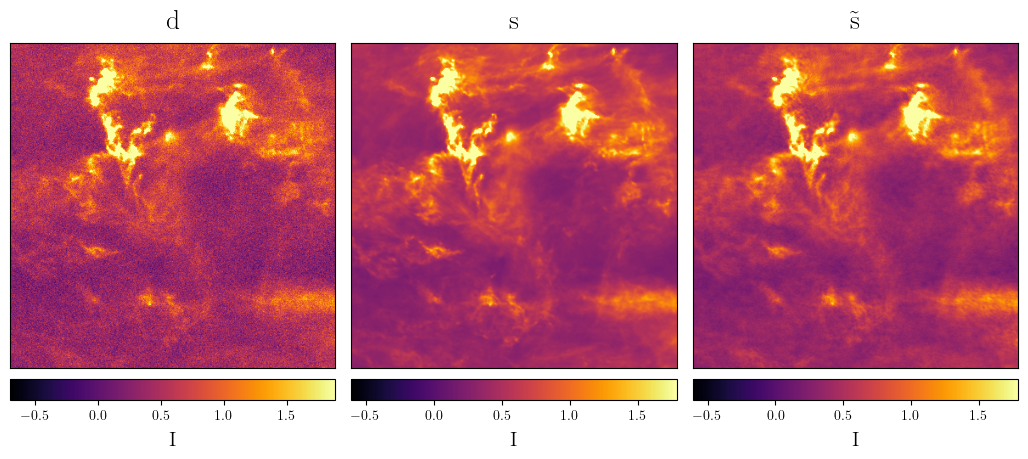

In [4]:
border_size = 64

fig, ax = plt.subplots(1, 3, figsize=(12, 5), sharex=True, sharey=True)

A = plot_subplot(ax,0,d,labels[0])
B = plot_subplot(ax,1,s,labels[1])
C = plot_subplot(ax,2,s_tilde,labels[2])

set_colorbar(ax,A,0,label=nature)
set_colorbar(ax,B,1,label=nature)
set_colorbar(ax,C,2,label=nature)

plt.subplots_adjust(left=0.08,bottom=0.05,right=0.92,top=0.95,wspace=0.05,hspace=0.15)

## Power spectra

We plot the power spectra of the maps.

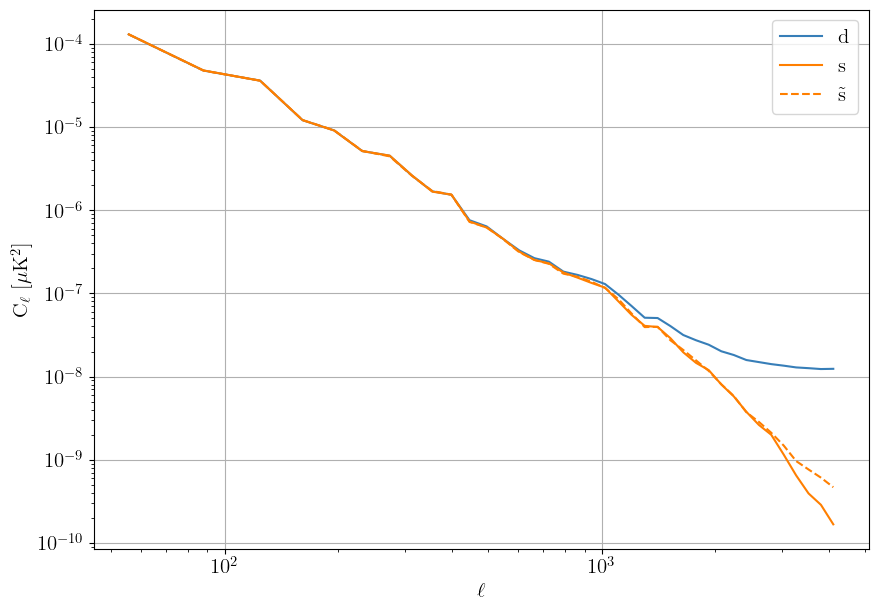

In [5]:
plot_PS(np.array([d,s,s_tilde]),labels,colors=colors,styles=styles,reso = 2.35,axis='l',fontsize=15)

## Histograms

We plot the histograms of the maps.

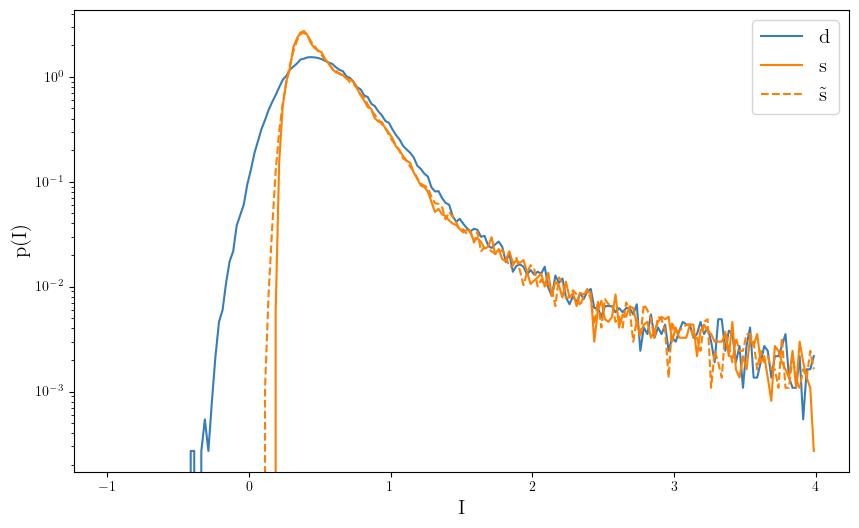

In [6]:
plot_hist(np.array([d,s,s_tilde]),labels=[r"$\rm{d}$",r"$\rm{s}$",r"$\rm{\tilde{s}}$"],colors=[color[0],color[1],color[1]],styles=['-','-','--'],n_bins=200,log=True,value_range=(-1,4),fontsize=15,nature=nature)

## WPH statistics

We plot the WPH statistics of the maps.

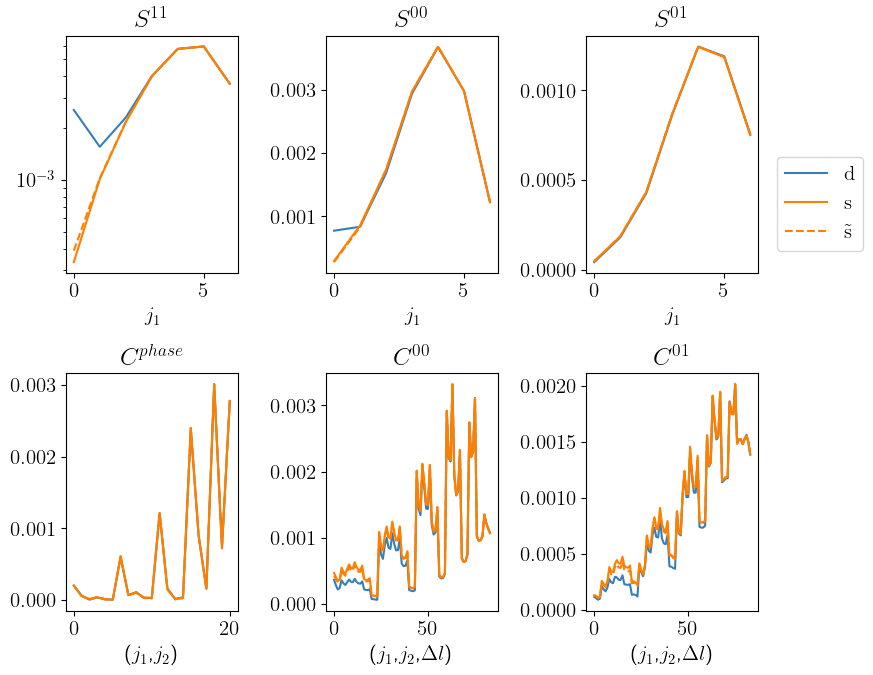

In [7]:
plot_wph(np.array([d,s,s_tilde]),labels=[r"$\rm{d}$",r"$\rm{s}$",r"$\rm{\tilde{s}}$"],colors=[color[0],color[1],color[1]],styles=['-','-','--'],J=7,L=4,dn=0,pbc=False)